In [1]:
import praw
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,timezone
from tqdm import  tqdm
import pandas as pd 
import seaborn as sns 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### **Loading the data using the reddit API**

In [2]:
# time range 
start = datetime(2025,1,1,tzinfo=timezone.utc)
end = datetime(2025,5,31,23,59,59,tzinfo=timezone.utc)

In [217]:
# connection 

reddit = praw.Reddit(
    client_id="eK7Gid3MOrvEWkCkXqHpVw",
    client_secret="vRj93NZQIDXpR43cX07CeESEcNsg7w",
    user_agent="SentimentBot"
)
subreddits = ["wallstreetbets","stocks","investing","options","ValueInvesting","Finance","pennystocks"]
redit_post = []

for subreddit in subreddits :
    for submission in tqdm(reddit.subreddit(subreddit).search('NVIDIA',limit=1000),desc = f'searcing for data about {subreddit}'):
        post_time = datetime.fromtimestamp(submission.created_utc,tz=timezone.utc)
        
        if start <= post_time <= end :
            redit_post.append({
                'id':submission.id,
            'title' : submission.title,
            'self_text' : submission.selftext,
            'date' : post_time.strftime('%Y-%m-%d'),
            'score' : submission.score,
            'num_comment' : submission.num_comments,
            'author' : str(submission.author),
            'subreddit' : str(submission.subreddit),
            'url' : submission.url})
data = pd.DataFrame(redit_post)
data.head()


searcing for data about wallstreetbets: 0it [00:00, ?it/s]

searcing for data about wallstreetbets: 240it [00:03, 61.05it/s]
searcing for data about stocks: 226it [00:03, 61.67it/s]
searcing for data about investing: 234it [00:03, 63.90it/s]
searcing for data about options: 242it [00:04, 60.02it/s]
searcing for data about ValueInvesting: 238it [00:03, 60.57it/s]
searcing for data about Finance: 3it [00:00, 11.22it/s]
searcing for data about pennystocks: 168it [00:03, 42.33it/s]


,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,https://preview.redd.it/iemihvrce9qe1.png?widt...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia ([NVDA](https://finance.yahoo.com/quote...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell? 🤔,2025-05-27,43,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


### **Data cleaning** 

##### after getting the data we need to clean the self_text from any links , markdown ...... for the analysis purpose

In [218]:
data.head(5)

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,https://preview.redd.it/iemihvrce9qe1.png?widt...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia ([NVDA](https://finance.yahoo.com/quote...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell? 🤔,2025-05-27,43,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


In [219]:
data.shape

(411, 9)

In [220]:
data.dtypes

id             object
title          object
self_text      object
date           object
score           int64
num_comment     int64
author         object
subreddit      object
url            object
dtype: object

##### first we sort the data by the dates in order to keep the sync of the dates 

In [221]:
data['date'] = pd.to_datetime(data['date'])

In [222]:
data.sort_values(by='date',ascending=True,inplace=True)
data.sort_index(inplace=True)

In [223]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,https://preview.redd.it/iemihvrce9qe1.png?widt...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia ([NVDA](https://finance.yahoo.com/quote...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell? 🤔,2025-05-27,43,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


In [224]:
from pprint import pprint
text = data['self_text'][2]
pprint(text)

('Nvidia ([NVDA](https://finance.yahoo.com/quote/NVDA)) has outperformed every '
 'stock in the S&P 500 ([\\^GSPC](https://finance.yahoo.com/quote/%5EGSPC)) '
 'since\xa0[the launch of ChatGPT\xa0'
 '](https://finance.yahoo.com/news/how-chatgpt-changed-the-world-of-tech-in-just-one-year-180957543.html)in '
 'late November 2022 Shares in the chipmaker have risen nearly 700% since '
 'ChatGPT brought the power of artificial intelligence to the masses, far '
 "outpacing the S&P 500's roughly 45% over the same time period. The next "
 'closest gain for an S&P 500 company in that time period is a 540% pop for '
 'Vistra Corp ([VST](https://finance.yahoo.com/quote/VST)).Nvidia has '
 'established itself as the key provider of chips needed to operate AI '
 'systems. Now at the epicenter of an AI arms race, Nvidia has established '
 'itself as[\xa0a cornerstone of the recent bull '
 'market](https://finance.yahoo.com/news/live/stock-market-today-tech-leads-stocks-higher-as-nvidia-surges-to-rec

In [225]:
import re 
def clean_text(text):
    # Remove markdown links 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    
    # Remove stray markdown artifacts 
    text = re.sub(r'\[\]|\(\)', '', text)
    
    # Replace \xa0 (non-breaking space) and \n (newlines) with space
    text = text.replace('\xa0', ' ').replace('\n', ' ')
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # strip leading/trailing whitespace
    return text.strip()


In [226]:
data['self_text'] =  data['self_text'].apply(lambda x : clean_text(x))

In [227]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell,2025-05-27,43,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


In [228]:
data['self_text'][0]

''

In [229]:
data['self_text'].apply(lambda x: pd.isna(x) or x.strip() == '')

0       True
1      False
2      False
3      False
4       True
       ...  
406    False
407    False
408    False
409    False
410    False
Name: self_text, Length: 411, dtype: bool

In [230]:
import numpy as np

In [231]:
data['self_text'].apply(lambda x:  np.nan if x.strip() == '' else x)

0                                                    NaN
1      Life happened Needed the funds The shares were...
2      Nvidia NVDA has outperformed every stock in th...
3                What covered call strikes should I sell
4                                                    NaN
                             ...                        
406    Auroras partnership with NVIDIA and Continenta...
407    SANA spiked because they had positive results ...
408    Why hello my fellow investors traders and prob...
409    Looking for some feed back on this stock might...
410    Starting the year with all quantum boats risin...
Name: self_text, Length: 411, dtype: object

In [232]:
data.dropna(axis=1,inplace=True)

In [233]:
data.head()

,id,title,self_text,date,score,num_comment,author,subreddit,url
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj
3,1kx0udl,50k on NVDA,What covered call strikes should I sell,2025-05-27,43,23,BokuwaKami,wallstreetbets,https://i.redd.it/eyiut7vvhe3f1.jpeg
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg


#####  Now after cleaning the data we need to access the score of the posts bc we assume that a higher score means hight unfluence so wz will set the threshold to 100 

In [234]:
for col in ['score','num_comment']:
    data[col] = data[col].astype(int)

In [235]:
data.dtypes

id                     object
title                  object
self_text              object
date           datetime64[ns]
score                   int32
num_comment             int32
author                 object
subreddit              object
url                    object
dtype: object

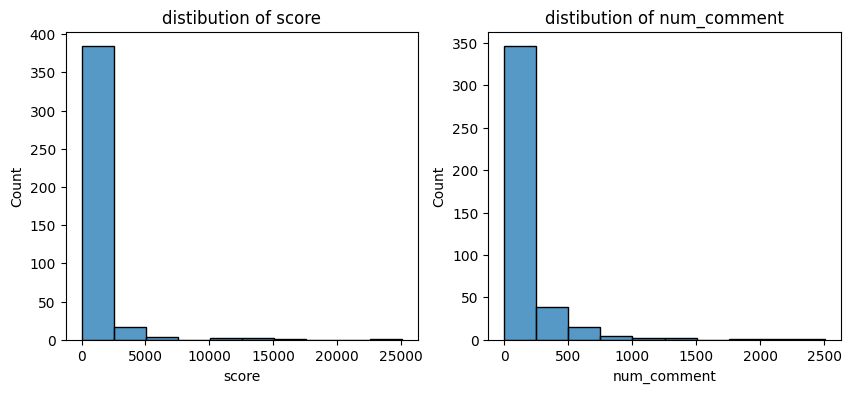

In [236]:
fig , ax = plt.subplots(1,2,figsize=(10,4))
ax = ax.flatten()
for i , col in  enumerate(['score','num_comment']):
    sns.histplot(data, x = col , ax=ax[i],bins=10)
    ax[i].set_title(f'distibution of {col}')

In [237]:
# posts with low score
len(data.loc[data["score"] < 100]) - len(data)

-150

In [238]:
data = data[data["score"] > 100 ]

In [239]:
data.score.min()

101

### **applying the sentiment analysis model finberta** 

-**FinRoBERTa (based on RoBERTa)**

* 1-Better performance and deeper context understanding in some use cases.

* 2-From: yiyanghkust/finbert-tone or you can look into models like mrm8488/bert-tiny-finetuned-financial-news-sentiment.

In [ ]:
from transformers import  AutoTokenizer , AutoModelForSequenceClassification,pipeline


model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
nlp = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,truncation=True)

##### testing the pipeline 

In [241]:
text = "the CEO is passaway  and the  board is looking a new chairman to replace it this will cause some instabilities on the stock market"
sentiment = nlp(text)[0]

In [242]:
def get_sentiment(text):
    result = nlp(text)[0]
    return result['label'],result['score']

data[['sentiment','sentiment_score']] = data['self_text'].apply(lambda x : get_sentiment(x)).apply(pd.Series)

In [243]:
data['sentiment'].value_counts()

sentiment
neutral     101
negative     35
positive     12
Name: count, dtype: int64

In [244]:
import yfinance as yf

df = yf.download('NVDA',start="2025-01-01",end="2025-5-31" )
data

[*********************100%***********************]  1 of 1 completed


,id,title,self_text,date,score,num_comment,author,subreddit,url,sentiment,sentiment_score
0,1kxrhap,Nvidia earnings are out – here are the numbers,,2025-05-28,1301,318,Force_Hammer,wallstreetbets,https://www.cnbc.com/2025/05/28/nvidia-nvda-ea...,neutral,0.424185
1,1jhaxzj,Took my Nvidia gains after 3 years of holding ...,Life happened Needed the funds The shares were...,2025-03-22,2535,203,thecheetahexpress,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,neutral,0.863899
2,1kvuqnj,NVIDIA Artificial Intelligence,Nvidia NVDA has outperformed every stock in th...,2025-05-26,255,86,wilbo75771,wallstreetbets,https://www.reddit.com/gallery/1kvuqnj,neutral,0.581886
4,1k03vah,Nvidia tanking after hours due to China export...,,2025-04-15,12487,974,mayorolivia,wallstreetbets,https://i.redd.it/v5ngumawi2ve1.jpeg,neutral,0.424185
5,1igaaox,"“DeepSeek . . . reportedly has 50,000 Nvidia G...",Industry analyst firm SemiAnalysis reports tha...,2025-02-02,11362,870,superdookietoiletexp,wallstreetbets,https://www.tomshardware.com/tech-industry/art...,negative,0.940869
...,...,...,...,...,...,...,...,...,...,...,...
356,1ksyoo2,"NVTS, Nvidia, and the WOLF at the door.",Just today Nvidia announced they are going to ...,2025-05-22,119,54,narayan77,pennystocks,https://www.reddit.com/r/pennystocks/comments/...,neutral,0.513783
361,1hw4bo9,Top 15 mentions of Pennystocks on Pennystock-a...,Since it helped a lot of yall yesterday here t...,2025-01-07,753,303,Short_Natural9024,pennystocks,https://i.redd.it/0unfqg01hnbe1.jpeg,neutral,0.927809
368,1ilabzs,Should I take profit? Will BBAI dilute?,I never take profits and I have been burned A ...,2025-02-09,153,237,Phat_Kitty_,pennystocks,https://i.redd.it/yx247m5ar2ie1.jpeg,neutral,0.883888
369,1hywu02,RVSN - P&D or legit opportunity? My research i...,Introduction and disclosure I am in no way ass...,2025-01-11,238,170,Alarming_Turnover_69,pennystocks,https://www.reddit.com/r/pennystocks/comments/...,neutral,0.895987


In [245]:
df.columns =df.columns.droplevel(1)

In [246]:
data.set_index('date',inplace=True)
data.sort_index(inplace=True)

In [247]:
data.head()

,id,title,self_text,score,num_comment,author,subreddit,url,sentiment,sentiment_score
date,,,,,,,,,,
2025-01-04,1ht1rod,Is Amazon still a good investment in 2025?,I see a lot of talk about the Mag7 everywhere ...,103,105,blackswaninvestor88,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.845422
2025-01-04,1htnnul,Jensen carrying the weight of the world,,25091,715,SorryLifeguard7,wallstreetbets,https://i.redd.it/kdkxyd6ne1be1.jpeg,neutral,0.424185
2025-01-04,1hte71i,NVIDIA Is Now Rumored To Switch Towards Samsun...,,2964,292,ZacTheBlob,wallstreetbets,https://wccftech.com/nvidia-is-rumored-to-swit...,neutral,0.424185
2025-01-06,1hv5dc3,Tesla's Deliveries Disappoint: Time To Take Pr...,Summary Teslas stock remains overvalued despi...,135,130,Goatofoptions,investing,https://www.reddit.com/r/investing/comments/1h...,negative,0.834820
2025-01-06,1huxyay,Nvidia supplier Foxconn reports record quarter...,Source Taiwans Foxconn 2317TW opens new tab th...,129,7,thelastsubject123,stocks,https://www.reddit.com/r/stocks/comments/1huxy...,positive,0.948855


In [248]:
def map_sentiment(sentiment):
    if sentiment == "positive" :
        return 1
    elif sentiment == "negative":
        return -1
    elif sentiment == "neutral":
        return 0 

In [249]:
data['reinforced_sentiment'] = data['score'] * 0.5 * data['sentiment_score'] * data['sentiment'].map(map_sentiment)

In [250]:
data.head()

,id,title,self_text,score,num_comment,author,subreddit,url,sentiment,sentiment_score,reinforced_sentiment
date,,,,,,,,,,,
2025-01-04,1ht1rod,Is Amazon still a good investment in 2025?,I see a lot of talk about the Mag7 everywhere ...,103,105,blackswaninvestor88,ValueInvesting,https://www.reddit.com/r/ValueInvesting/commen...,neutral,0.845422,0.000000
2025-01-04,1htnnul,Jensen carrying the weight of the world,,25091,715,SorryLifeguard7,wallstreetbets,https://i.redd.it/kdkxyd6ne1be1.jpeg,neutral,0.424185,0.000000
2025-01-04,1hte71i,NVIDIA Is Now Rumored To Switch Towards Samsun...,,2964,292,ZacTheBlob,wallstreetbets,https://wccftech.com/nvidia-is-rumored-to-swit...,neutral,0.424185,0.000000
2025-01-06,1hv5dc3,Tesla's Deliveries Disappoint: Time To Take Pr...,Summary Teslas stock remains overvalued despi...,135,130,Goatofoptions,investing,https://www.reddit.com/r/investing/comments/1h...,negative,0.834820,-56.350340
2025-01-06,1huxyay,Nvidia supplier Foxconn reports record quarter...,Source Taiwans Foxconn 2317TW opens new tab th...,129,7,thelastsubject123,stocks,https://www.reddit.com/r/stocks/comments/1huxy...,positive,0.948855,61.201177


In [251]:
sentiment_evolution = data.groupby(data.index)['reinforced_sentiment'].mean().reset_index()
sentiment_evolution.head()

,date,reinforced_sentiment
0,2025-01-04,0.000000
1,2025-01-06,2.425419
2,2025-01-07,11.816204
3,2025-01-08,0.000000
4,2025-01-09,0.000000


In [252]:
df['date'] = df.index

In [253]:
df_1 = pd.merge(sentiment_evolution,df[['Close','date']],on='date',how='left')

In [254]:
df_1.isna().sum()

date                     0
reinforced_sentiment     0
Close                   20
dtype: int64

In [273]:
def sentiment(reinforced_sentiment):
    if reinforced_sentiment > 0 :
        return "positive"
    elif reinforced_sentiment == 0 :
        return   "neutral"
    elif  reinforced_sentiment < 0 :
        return "negative"

df_1['sentiment'] = df_1['reinforced_sentiment'].map(sentiment)

In [274]:
df_1.head()

,date,reinforced_sentiment,Close,sentiment,color
1,2025-01-06,2.425419,149.416245,positive,blue
2,2025-01-07,11.816204,140.127106,positive,blue
3,2025-01-08,0.000000,140.097122,neutral,gray
5,2025-01-10,0.000000,135.897507,neutral,gray
7,2025-01-13,-80.840910,133.217743,negative,NaN


In [255]:
df_1.dropna(axis=0,inplace=True)

In [282]:
color_map = {
    'positive': 'green',
    'neutral': 'gray',
    'negative': 'red'
}
# Map the colors
df_1['color'] = df_1['sentiment'].map(color_map)

In [283]:
fig = go.Figure()

# Closing Price (right y-axis #1)
fig.add_trace(go.Scatter(
    x=df_1['date'],
    y=df_1['Close'],
    mode='lines+markers',
    yaxis='y2',
    name='Closing price on the NVDA stocks',
    line=dict(color='green')
))

# Reinforced Sentiment (left y-axis)
fig.add_trace(go.Scatter(
    x=df_1['date'],
    y=df_1['reinforced_sentiment'],
    mode='lines+markers',
    yaxis='y1',
    name='Sentiment',
    marker=dict(color=df_1['color']),
    line=dict(color='blue')
))



fig.update_layout(
    title='Reinforced Sentiment and Closing Price evolution',
    yaxis=dict(
        title='Reinforced Sentiment',
        side='left'  
    ),
    
    yaxis2=dict(
        title='Closing Price',

        anchor='x',
        overlaying='y',
        side='right',
        position=0.85
    ),
    
    legend=dict(x=0.1, y=1.1, orientation='h'),
    margin=dict(l=60, r=120, t=80)
)

fig.show()


In [257]:
corr = df_1[['reinforced_sentiment','Close']].corr()

In [281]:
fig = go.Figure(data=go.Heatmap(
                z=corr.values,
                x = corr.columns,
                y= corr.index,
                colorscale='tropic',
))
fig.show()